In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
fig = plt.figure()  #stworzenie pustego wykresu bez osi
fig.suptitle('No axes on this figure')  # dodanie podtytułu
fig


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

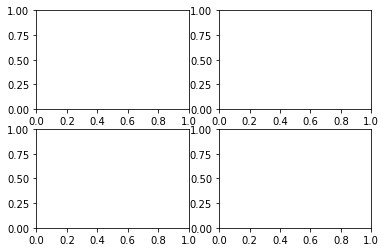

In [7]:
fig, ax_lst = plt.subplots(2, 2) # Utworzenie grida 2x2 w formie wykresów

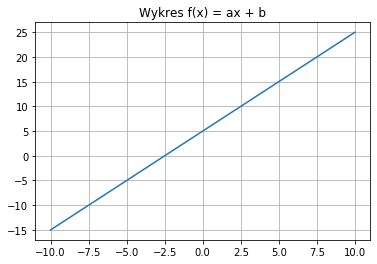

In [14]:
## FUNKCJA LINIOWA  y = ax + b

a = 2 #podanie argumentu a 
b = 5 #podanie argumentu b
x = range(-10, 11)  # lista argumentów x

y = []  # lista wartości
for i in x:
    y.append(a * i + b)

plt.plot(x, y) #stworzenie wykresu
plt.title('Wykres f(x) = ax + b')  #dodanie tytułu
plt.grid(True) #dodanie osi pomocniczych
plt.show() #wyświtlenie wykresu

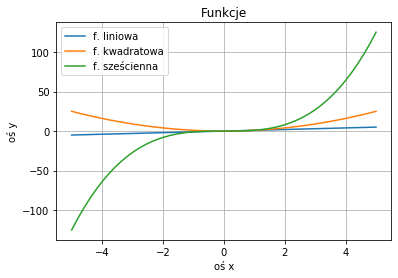

In [26]:
## FUNKCJE

x = np.linspace(-5, 5, 50) #lista argumentów 
plt.plot(x, x, label='f. liniowa')    #parametry funkcji liniowej
plt.plot(x, x**2, label='f. kwadratowa')  #parametry funkcji kwadratowej
plt.plot(x, x**3, label='f. sześcienna')      #parametry funkcji sześciennej

plt.xlabel('oś x') #tytuły osi 
plt.ylabel('oś y')
plt.title("Funkcje") #tytuł wykresu

plt.legend() #dodanie legendy
plt.grid(True) #dodanie osi pomocniczych
plt.show()

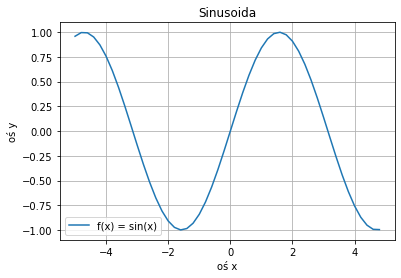

In [25]:
##FUNKCJA SINUS
x = np.arange(-5, 5, 0.2)
y = np.sin(x)
plt.plot(x, y, label='f(x) = sin(x)')
plt.xlabel('oś x') #tytuły osi 
plt.ylabel('oś y')
plt.title("Sinusoida") #tytuł wykresu
plt.grid(True) #dodanie osi pomocniczych
plt.legend() #dodanie legendy
plt.show()

In [9]:
#Wczytanie do zmiennej cars zawartości pliku csv
import pandas as pd
cars = pd.read_csv('samochody1tys.csv')
cars

,id,marka,model,rok_produkcji,rodzaj_silnika,pojemnosc_silnika,przebieg,cena,wojewodztwo
0,0,Nissan,X-Trail III,2014.0,Diesel,1600.0,160000.0,75900.0,Dolnośląskie
1,1,BMW,X1 E84,2012.0,Diesel,2000.0,149000.0,70900.0,Świętokrzyskie
2,2,Opel,Zafira A,2004.0,Benzyna+CNG,1600.0,99000.0,9800.0,Opolskie
3,3,Hyundai,i10 I,2008.0,Benzyna,1100.0,93000.0,11900.0,Łódzkie
4,4,Volkswagen,CC,2010.0,Diesel,1968.0,127428.0,49900.0,Wielkopolskie
...,...,...,...,...,...,...,...,...,...
995,995,Alfa Romeo,159,2009.0,Diesel,2387.0,182000.0,33900.0,Małopolskie
996,996,Škoda,Fabia II,2012.0,Benzyna,1200.0,42700.0,25400.0,Lubelskie
997,997,Renault,Modus,2004.0,Benzyna,1200.0,168111.0,10900.0,Łódzkie
998,998,Audi,A3 8L,2000.0,Benzyna,1595.0,226500.0,5400.0,Małopolskie


In [155]:
##WYKRES SŁUPKOWY
#przypisanie do zmiennej zliczonej ilości samochodów względem rodaju silnika
car_group = cars.groupby('rodzaj_silnika').count()
car_group = car_group.iloc[:, 0:1]
car_group

,id
rodzaj_silnika,
Benzyna,478
Benzyna+CNG,2
Benzyna+LPG,35
Diesel,475
Elektryczny,1
Hybryda,9


In [156]:
#stworzenie tablicy zawierającej numeryczne odpowiedniki każdej kategorii
N = car_group.count()["id"]
N = np.arange(N)
#przypisanie kolumny id
car_group = car_group["id"]

array([0, 1, 2, 3, 4, 5], dtype=int64)

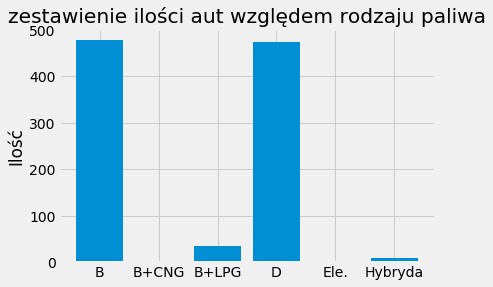

In [115]:
width = 0.8
plt.bar(N, car_group, width, 0)
plt.title("zestawienie ilości aut względem rodzaju paliwa")
plt.ylabel('Ilość')
plt.grid(True) #dodanie osi pomocniczych
plt.xticks(N, ('B', 'B+CNG','B+LPG','D','Ele.','Hybryda') )
plt.show()

In [121]:
##WYKRES KOŁOWY
#przypisanie do zmiennej zliczonej ilości samochodów względem marki
car_brand= cars.groupby('marka').count()
car_brand = car_brand.iloc[:, 0:2]
#wybranie 6 marek z największą ilością aut
car_brand = car_brand.sort_values(by='id').tail(6)  
car_brand

,id,model
marka,,
Ford,59,59
Renault,59,59
BMW,66,66
Audi,70,70
Volkswagen,92,92
Opel,105,105


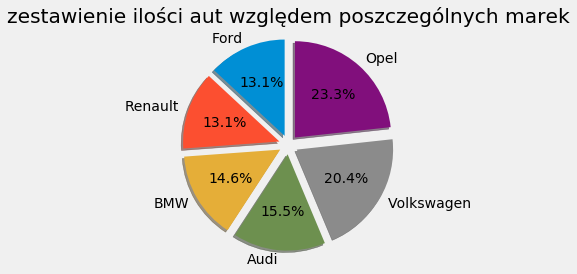

In [122]:
labels = 'Ford', 'Renault','BMW','Audi','Volkswagen','Opel'
sizes = car_brand["id"]
explode = (0.1,0.1,0.1,0.1,0.1,0.1) #odległości między częściamy koła
fig1, ax1 = plt.subplots()
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.title("Produkcja aut poszczególnych marek")

plt.show()

Text(0.5, 1.0, 'Samochody')

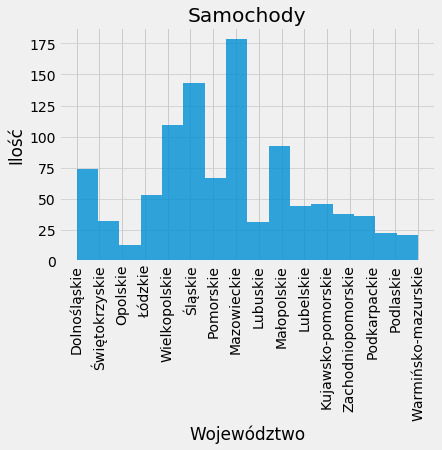

In [153]:
##HISTOGRAM
#Zapisanie do zmiennej tablicy zawierającej nazwy województw
carLocation = cars.iloc[:, [8]].to_numpy()
bins = 16 #ustalenie zakresu osi x

plt.hist(carLocation, bins= bins,  alpha=0.8, rwidth=1)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Województwo')
plt.xticks(rotation=90) #obrócenie podpisów osi x 
plt.ylabel('Ilość')
plt.title('Samochody')

Text(0.5, 1.0, 'Samochody')

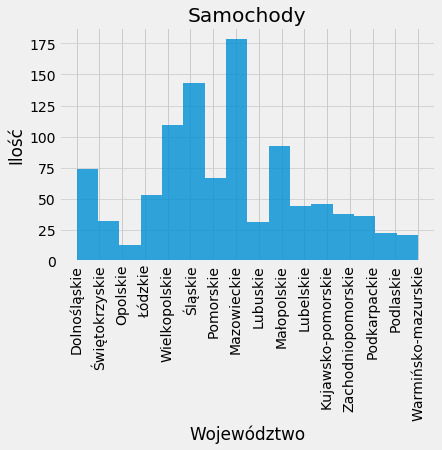